<a href="https://colab.research.google.com/github/harishahamed26/online-shoppers-intension-Machine-learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment
"""

Student ID              :   22141506

University              :   Birmingham City University

Course                  :   Msc Artificial Intelligence

Module Title            :   MACHINE LEARNING

Module Code             :   CMP7288

Assessment Title        :   Coursework 

Assessment Identifier:            CWRK001

School                  :   School of Computing and Digital Technology

Module Co-ordinator     :   Besher Alhalabi

Code Created Date       :   28-DEC-2022

Programmming Language   :   Python V3.8.16

Dataset Name            :   Online Shopper Intention

File Type               :   CSV

Assessment Summary      : In this assessment the student will apply modern machine learning techniques to solve real-world analytics problems. Each student will submit a comprehensive report detailing the proposed work, results and conclusions.
The report will be submitted as one deliverable in the form of a written report. The standard of academic writing should be excellent. (Maximum words: 4000 words, excluding tables, figures and references).
        

Program Description     : 
        
Steps To be followed    :
     
Version.                : 1.0
  


"""


# Exploratory Data Analysis


In [3]:
#Checking the Version of python

! python --version


Python 3.8.16


Reading CSV file and checking the Head, shape, info, describe and isnull

In [ ]:
#importing of pandas to read the CSV file and DataFrame

import pandas                     as pd
import warnings
warnings.filterwarnings('ignore')


#OSI_Data_Original = pd.read_csv("https://drive.google.com/file/d/1jyGmY5t8eVjl8hfjbQPE-yyzoDrHXulp/view?usp=share_link")

import requests

url = "https://drive.google.com/file/d/1jyGmY5t8eVjl8hfjbQPE-yyzoDrHXulp/view?usp=share_link"
s = requests.get(url).content
OSI_Data_Original = pd.read_csv(s)


print("\n Printing first 5 rows in the dataset:")
print(OSI_Data_Original.head(5))

print("\n Shape:",OSI_Data_Original.shape)

print("\n Dataset Information:\n")
print(OSI_Data_Original.info())

print("\n Dataset Description:\n")
print(OSI_Data_Original.describe())

print("\n Checking the Null values in the Dataset:\n")
print(OSI_Data_Original.isnull().sum())



Encoding and checking the Columns, Head, Info

In [ ]:
OSI_Data_SL = pd.get_dummies(OSI_Data_Original)
OSI_Data_SL.fillna(0, inplace = True)

print("\n Printing columns after encoding using get dummies\n")
print(OSI_Data_SL.columns)


print("\n Printing 5 rows of OSI_Data_SL after encoding using get dummies\n")
print(OSI_Data_SL.head(5))

print("\n Dataset Information after encoding:\n")
print(OSI_Data_SL.info())

Revenue

In [ ]:
import matplotlib.pyplot    as plt
import seaborn              as sns

# Customer buying and not buying Visualisation
import warnings
warnings.filterwarnings('ignore')

print(OSI_Data_SL['Revenue'].value_counts())

print("\n")

# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(OSI_Data_SL['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

Month

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64




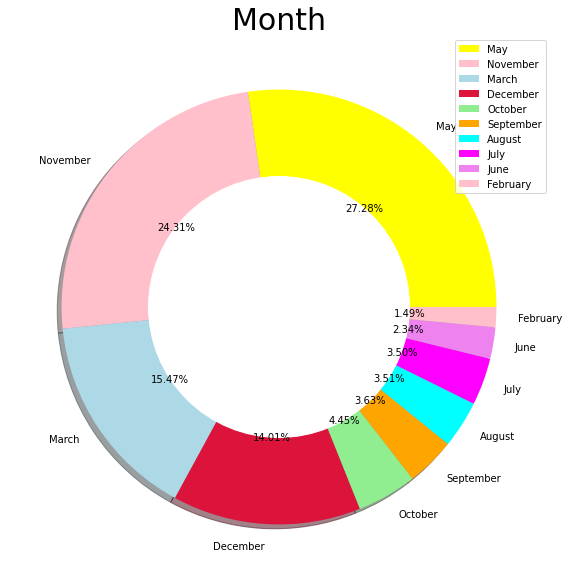

In [7]:
import matplotlib.pyplot    as plt
import seaborn              as sns


print(OSI_Data_Original['Month'].value_counts())

print("\n")
# creating a donut chart for the months variations
# plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

Visitor


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64




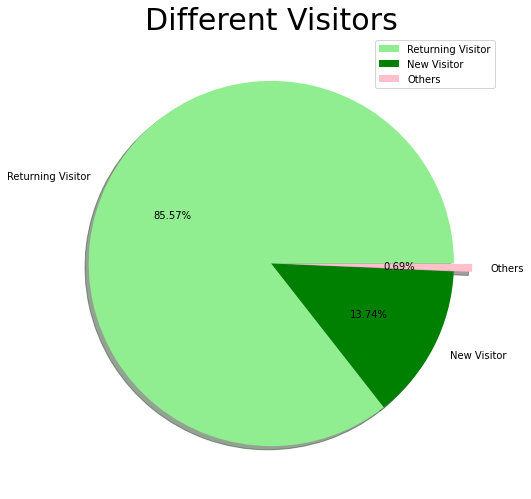

In [8]:
import matplotlib.pyplot    as plt
import seaborn              as sns


print(OSI_Data_Original['VisitorType'].value_counts())
print("\n")

# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 10)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

# Supervised Learning 

Splitting the data to process the Supervised Learning models

In [9]:
# Importing of Train Test Split from sklearn model selection

from sklearn.model_selection      import train_test_split


y = OSI_Data_SL['Revenue']
x = OSI_Data_SL.drop(['Revenue'], axis = 1)

print(f'shape of x: {x.shape} and shape of y: {y.shape} \n')

#splitting for training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state =0 )
print(f'shape of x train: {x_train.shape} and shape of x test: {x_test.shape}')
print(f'shape of y train: {y_train.shape} and shape of y test: {y_test.shape}')

shape of x: (12330, 28) and shape of y: (12330,) 

shape of x train: (7398, 28) and shape of x test: (4932, 28)
shape of y train: (7398,) and shape of y test: (4932,)


Supervised Learning model analysis
1.Support Vector Machine

In [10]:
#Importing sklearn SVM for Support Vector Machine
from sklearn                import svm
SVM_model = svm.SVC()
SVM_model.fit(x_train, y_train)

y_predict = SVM_model.predict(x_test)

print(f"Training Accuracy: {SVM_model.score(x_train, y_train)} Testing Accuracy: {SVM_model.score(x_test, y_test)}")


Training Accuracy: 0.850500135171668 Testing Accuracy: 0.8406326034063261


SVM Accuracy: 84.06326034063261

 Classification Report
               precision    recall  f1-score   support

       False       0.84      1.00      0.91      4137
        True       1.00      0.01      0.02       795

    accuracy                           0.84      4932
   macro avg       0.92      0.51      0.47      4932
weighted avg       0.87      0.84      0.77      4932



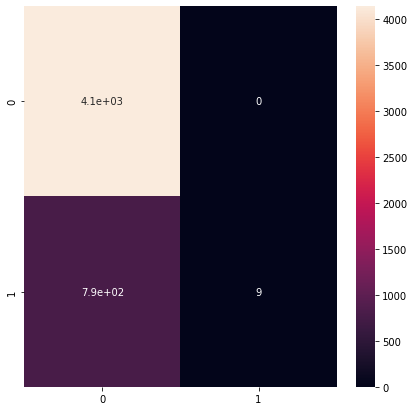

In [11]:
'''

Import scikit-learn metrics module for accuracy calculation c
Classification Report and Confusion Matrix

Importing Matplotlib pyplot and Seaborn to plot the Confusion Matric of the model

'''
from sklearn                import metrics
from sklearn.metrics        import classification_report, confusion_matrix
import matplotlib.pyplot    as plt
import seaborn              as sns


print("SVM Accuracy:",metrics.accuracy_score(y_test, y_predict)*100)
print("\n Classification Report\n",classification_report(y_test, y_predict))

SVM_Accuracy = metrics.accuracy_score(y_test, y_predict)*100
                                      
cm = metrics.confusion_matrix(y_test, y_predict)
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(cm, annot = True)
plt.show()



Tuning the model using GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,cv=KFold(n_splits=2))
 
# fitting the model for grid search
grid.fit(x_train, y_train)


Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   2.5s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.852 total time=   3.1s


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))


Supervised Learning model analysis
2.Gaussian Naive Bayes

In [13]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 


# making predictions on the testing set 
y_pred = gnb.predict(x_test) 


# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

GNB_Accuracy = metrics.accuracy_score(y_test, y_pred)*100



Gaussian Naive Bayes model accuracy(in %): 79.60259529602595


In [14]:
# Determining which model is best based on the accuracy 

if GNB_Accuracy > SVM_Accuracy:
   print("Gaussian Naive Bayes Model is good based on the accurancy")
elif GNB_Accuracy < SVM_Accuracy:
   print("Support Vector Machine Model is good based on the accurancy")
else:
   print("Both Gaussian Naive Bayes Model and Support Vector Machine are good")

Support Vector Machine Model is good based on the accurancy


# UnSupervised Learning

(12330, 2)


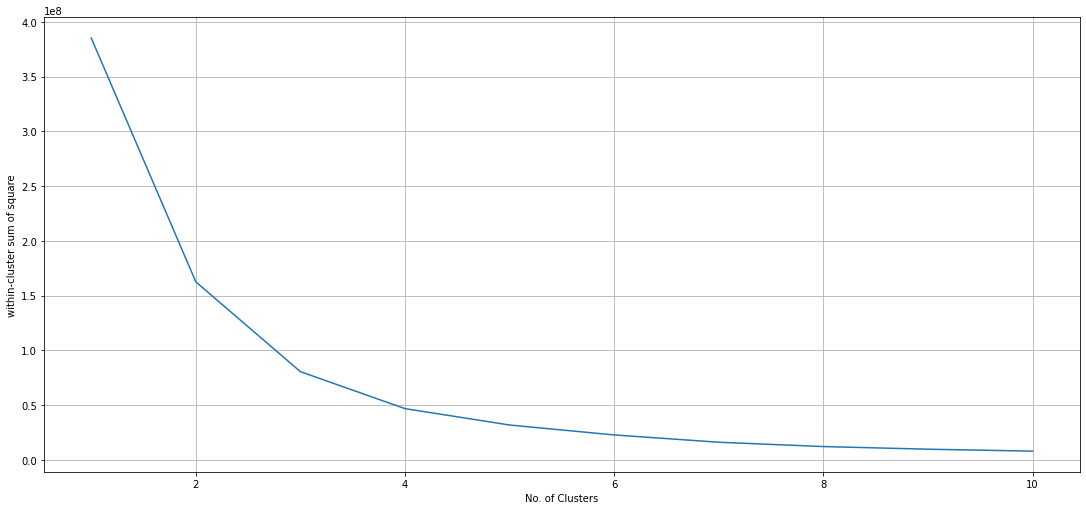

In [15]:
x = OSI_Data_SL.iloc[:,[1,6]].values
print(x.shape)


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()


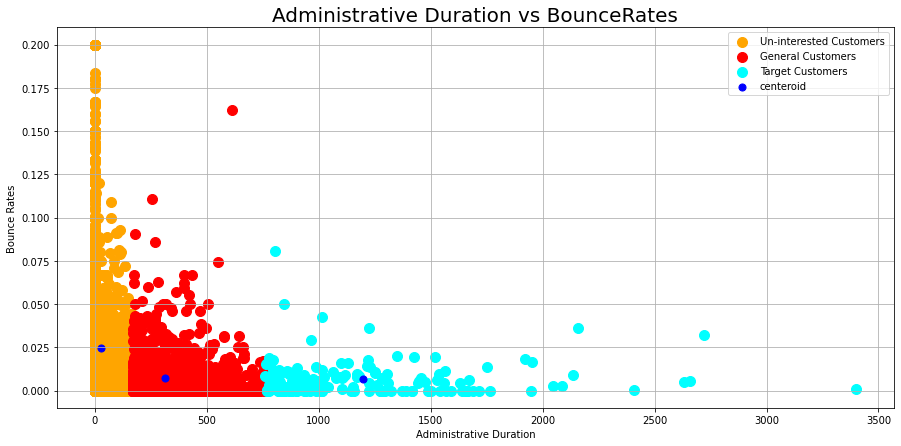

In [16]:

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

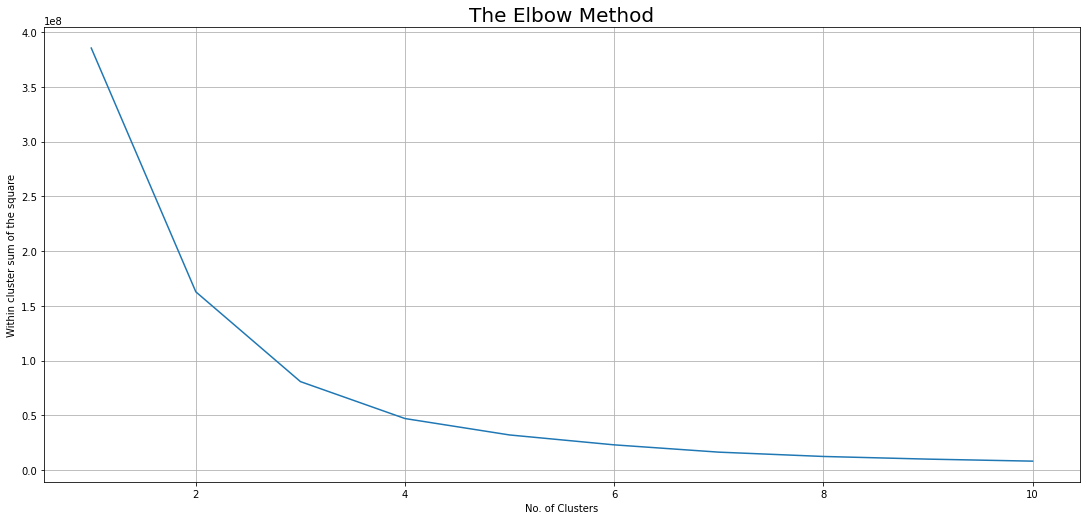

In [17]:
# administrative duration vs bounce rates
x = OSI_Data_SL.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of the square')
plt.show()

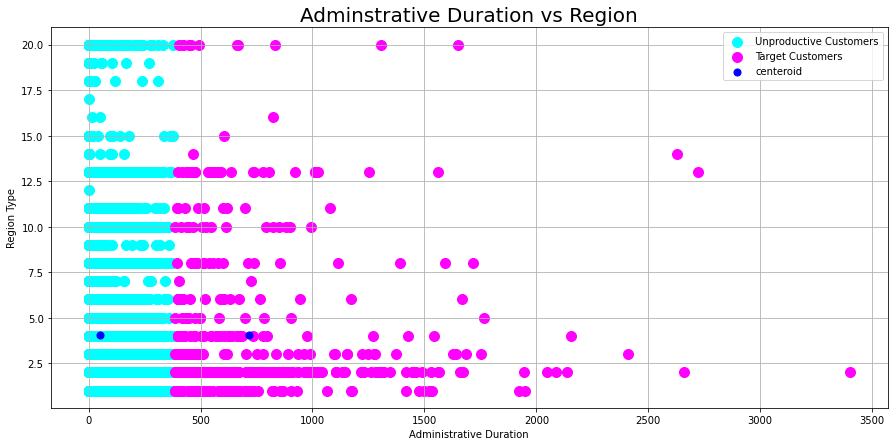

In [18]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'cyan', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()